# Seattle Library Data

**Aufgabe**: <br/>

Seattle Library Datenanalyse: Die Library von Seattle veröffentlicht vorbildlich einige ihrer gesammelten Daten. Wir haben hier ein kleines Beispiel zusammengestellt, in dem Teile der Daten heruntergeladen werden, in einen Pandas-DataFrame geladen werden und dann analysiert werden. Darin könnt ihr noch ein paar weitere Funktionalitäten von pandas entdecken.

Erstellt ein neues Jupyter Notebook und überlegt euch für die Aufgabe drei Fragen, die ihr mittels einer Analyse mit Pandas auf die Daten anwenden könnt. Visualisiert eure Analysen durch tabellarische Form oder ein Histogramm.

**Datasets**:

* [Checkouts by Title](https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6)
* [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf)

**API-dokumenation**:
* Paging through Data https://dev.socrata.com/docs/queries/
* Queries using SODA https://dev.socrata.com/docs/paging.html

In [39]:
%matplotlib inline

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

from matplotlib.ticker import ScalarFormatter
from io import StringIO
from pathlib import Path

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Checkout Data Analysis 2012-2021

In [101]:
def load_data(start_year=2012, end_year=2013, start_month=2, end_month=4, limit=1000,
              filename='temp_data.csv'):
    """
    Helper function to download csv datasets for a range of years
    and months. By using the argument `limit` limit the count of 
    data entries per year.

    Parameters:

    - `start_year`: Set the start year (e.g. `2012`)
    - `end_year`: Set the end year (e.g. `2013`)
    - `start_month`: Set the starting month (e.g. `2` == February)
    - `end_month`: Set the ending month (e.g. `3` == March)
    - `limit`: Limits the amount of data entries retrieved for each month
    - `filename`: Set a filename for your csv

    Example:
    
    Get all checkout data for March and April between 2012 and 2021. Limit 
    the retrieved data for each month to 1000 and save the file as `checkouts.csv` 

    `load_data(start_year=2012, end_year=2021, start_month=3, end_month=4, limit=1000, filename='2012-21_seattlelib_checkouts.csv')`
    """
    # Create pd.DataFrame to store csv data
    df = pd.DataFrame()

    # Iterate over years and months and load csv data
    for year in range(start_year, (end_year + 1)):
        for month in range(start_month, (end_month + 1)):
            url = f"https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear={year}&checkoutmonth={month}&$limit={limit}"
            print(f'Loading csv data for {month}/{year} from: {url}')
            csv_content = urllib.request.urlopen(url).read().decode('utf-8')
            temp_df = pd.read_csv(StringIO(csv_content))
            df = pd.concat([df, temp_df], ignore_index=True)

    # Save DF to disk as csv
    print(f'Saving csv as {filename}')
    df.to_csv(filename, index=False)

### About the dataset
- Get library checkout data from the years **2012 to 2021**
- Limit data entries for each year to **20,000** and set the month to **March** to make each year comparable
- Concat each year to a `pd.DataFrame`
- Save the complete DataFrame as `csv`

In [3]:
load_data(start_year=2012, end_year=2021, start_month=3, end_month=3, 
          limit=20000, filename='2012-21_seattlelib_checkouts.csv')

Loading csv data for 3/2012 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2012&checkoutmonth=3&$limit=20000
Loading csv data for 3/2013 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2013&checkoutmonth=3&$limit=20000
Loading csv data for 3/2014 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2014&checkoutmonth=3&$limit=20000
Loading csv data for 3/2015 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2015&checkoutmonth=3&$limit=20000
Loading csv data for 3/2016 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2016&checkoutmonth=3&$limit=20000
Loading csv data for 3/2017 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2017&checkoutmonth=3&$limit=20000
Loading csv data for 3/2018 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&checkoutmonth=3&$limit=20000
Loading csv data for 3/2019 from: https://data.s

## **Analysis**

In [3]:
# Read csv
checkout_df = pd.read_csv(Path('./2012-21_seattlelib_checkouts.csv'))

In [4]:
checkout_df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,Freegal,SONG,2012,3,1,Jagadananda Karaka,NaN,E. Gayatri,NaN,NaN,NaN
1,Physical,Horizon,BOOK,2012,3,2,Puddles,NaN,NaN,Rain and rainfall Fiction,NaN,NaN
2,Digital,Freegal,SONG,2012,3,1,The Call Up,NaN,The Clash,NaN,NaN,NaN
3,Physical,Horizon,BOOK,2012,3,1,empty copper sea,NaN,NaN,Large type books,NaN,NaN
4,Digital,Freegal,SONG,2012,3,1,Any Day Now,NaN,Elvis Presley,NaN,NaN,NaN


In [171]:
checkout_df.tail(3)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
199997,Physical,Horizon,BOOK,2021,3,4,Tua and the elephant / by R.P. Harris ; illust...,"Harris, R. P. (Randal Perry)","Asiatic elephant Juvenile fiction, Elephants J...","Chronicle Books,",2012.
199998,Digital,OverDrive,AUDIOBOOK,2021,3,2,"Traitor's Moon: Nightrunner Series, Book 3 (un...",Lynn Flewelling,"Fantasy, Fiction","Blackstone Audio, Inc.",2008
199999,Digital,OverDrive,EBOOK,2021,3,1,The Mark of the Golden Dragon: Being an Accoun...,L. A. Meyer,"Historical Fiction, Young Adult Fiction",Houghton Mifflin Harcourt Trade and Reference,2011


Check if monthly distribution of data entries is correct, i.e. **only** month of March is present

In [6]:
checkout_df['checkoutmonth'].value_counts() # *checkoutmonth* == 3 == March

checkoutmonth
3    200000
Name: count, dtype: int64

In [7]:
checkout_df.shape

(200000, 12)

In [8]:
checkout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   usageclass       200000 non-null  object 
 1   checkouttype     200000 non-null  object 
 2   materialtype     200000 non-null  object 
 3   checkoutyear     200000 non-null  int64  
 4   checkoutmonth    200000 non-null  int64  
 5   checkouts        200000 non-null  int64  
 6   title            200000 non-null  object 
 7   isbn             0 non-null       float64
 8   creator          164648 non-null  object 
 9   subjects         190133 non-null  object 
 10  publisher        181073 non-null  object 
 11  publicationyear  178468 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 18.3+ MB


### Improve memory usage

In [9]:
# Remove isbn column as it contains no values
print(checkout_df[checkout_df['isbn'].notna()])

del checkout_df['isbn']

Empty DataFrame
Columns: [usageclass, checkouttype, materialtype, checkoutyear, checkoutmonth, checkouts, title, isbn, creator, subjects, publisher, publicationyear]
Index: []


In [10]:
# Convert columns to appropriate dtypes
def improve_memory_usage(df):
    df['usageclass'] = df['usageclass'].astype('category')
    df['checkouttype'] = df['checkouttype'].astype('category')
    df['checkoutmonth'] = df['checkoutmonth'].astype('int8')
    df['checkouts'] = df['checkouts'].astype('int16')
    df['checkoutyear'] = df['checkoutyear'].astype('int16')
    return df

# Check for num of unique values
print(checkout_df['usageclass'].unique())
print(checkout_df['checkouttype'].unique())

checkout_df = improve_memory_usage(checkout_df)

['Digital' 'Physical']
['Freegal' 'Horizon' 'OverDrive' 'Hoopla' 'Zinio']


→ reduced `memory usage` for approx. 47 %

In [12]:
checkout_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   usageclass       200000 non-null  category
 1   checkouttype     200000 non-null  category
 2   materialtype     200000 non-null  object  
 3   checkoutyear     200000 non-null  int16   
 4   checkoutmonth    200000 non-null  int8    
 5   checkouts        200000 non-null  int16   
 6   title            200000 non-null  object  
 7   creator          164648 non-null  object  
 8   subjects         190133 non-null  object  
 9   publisher        181073 non-null  object  
 10  publicationyear  178468 non-null  object  
dtypes: category(2), int16(2), int8(1), object(6)
memory usage: 10.5+ MB


### **Statistics and Distributions**

#### Frequency distribution by `materialtype` (books, ebooks, audiobooks etc.)

In [103]:
# All available materialtypes in dataset
checkout_df['materialtype'].unique()

array(['SONG', 'BOOK', 'SOUNDDISC', 'VIDEODISC', 'VIDEO', 'MIXED', 'CR',
       'EBOOK', 'AUDIOBOOK', 'MUSIC', 'ER', 'ER, VIDEODISC', 'VISUAL',
       'VIDEOCASS', 'ER, SOUNDDISC', 'SOUNDDISC, VIDEODISC', 'SOUNDCASS',
       'MAP', 'SOUNDREC', 'ATLAS', 'MUSICSNDREC', 'KIT', 'MOVIE',
       'MAGAZINE', 'TELEVISION', 'FLASHCARD, SOUNDDISC',
       'SLIDE, SOUNDCASS, VIDEOCASS', 'REGPRINT', 'LARGEPRINT', 'COMIC',
       'VIDEOREC', 'SOUNDDISC, SOUNDREC', 'VIDEOCART', 'MICROFORM',
       'GLOBE', 'REGPRINT, SOUNDDISC', 'SOUNDDISC, VIDEOCASS',
       'UNSPECIFIED'], dtype=object)

In [104]:
# Get top 10 materialtypes
checkout_df['materialtype'].value_counts()[:10]

materialtype
BOOK          94230
EBOOK         41718
SOUNDDISC     17848
VIDEODISC     17355
AUDIOBOOK     16562
SONG           7885
MUSIC          1507
MOVIE           745
TELEVISION      515
VIDEO           254
Name: count, dtype: int64

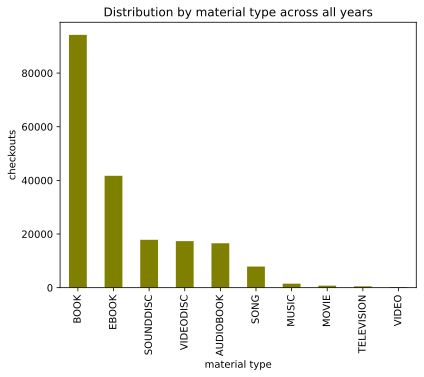

In [105]:
# Plot top 10 materialtypes
checkout_df['materialtype'].value_counts()[:10].plot.bar(color='olive', 
                                                         xlabel='material type', 
                                                         ylabel='checkouts',
                                                         title='Distribution by material type across all years');

#### Overall `checkout` distribution across all years

Plots the distribution of summed checkouts for all unique titles, i.e. how many titles were checked out once vs. a hundred times across all years

In [172]:
# Stats for all unique titles in dataset
checkout_df.groupby('title')['checkouts'].sum().describe()

count    172313.000000
mean          3.965365
std          10.685833
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1270.000000
Name: checkouts, dtype: float64

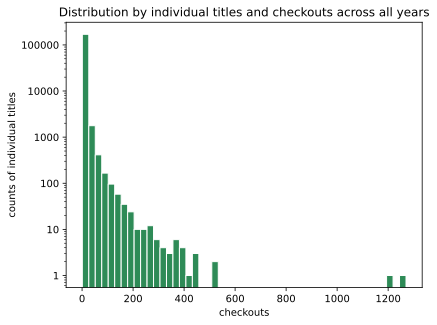

In [173]:
# Plot unique title distribution by summed checkouts across all years
checkout_data = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)

plt.hist(checkout_data, bins=50, log=True, edgecolor='white', color='seagreen')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('checkouts')
plt.ylabel('counts of individual titles')
plt.title('Distribution by individual titles and checkouts across all years')

plt.show()

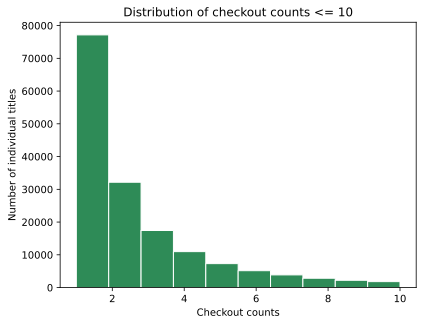

In [124]:
# Plot unique title distribution by summed checkouts across all years 
# for all unique titles which where checked out <= 10 times
checkouts_ser = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)
checkout_bin10 = checkouts_ser[(checkouts_ser >= 1) & (checkouts_ser <= 10)]

plt.hist(checkout_bin10, bins=10, edgecolor='white', color='seagreen')
plt.xlabel('Checkout counts')
plt.ylabel('Number of individual titles')
plt.title('Distribution of checkout counts <= 10')

plt.show()

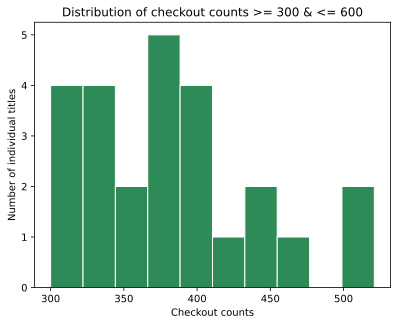

In [125]:
# Plot unique title distribution by summed checkouts across all years 
# for all unique titles which where checked out between 300 and 600 times
checkouts_ser = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)
checkout_bin300 = checkouts_ser[(checkouts_ser >= 300) & (checkouts_ser <= 600)]

plt.hist(checkout_bin300, bins=10, edgecolor='white', color='seagreen')
plt.xlabel('Checkout counts')
plt.ylabel('Number of individual titles')
plt.title('Distribution of checkout counts >= 300 & <= 600')

plt.show()

In [169]:
bins = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)

bin5 = bins[(bins >= 1) & (bins <= 5)]
bin10 = bins[(bins >= 6) & (bins <= 10)]
bin25 = bins[(bins >= 11) & (bins <= 25)]
bin50 = bins[(bins >= 26) & (bins <= 50)]
bin100 = bins[(bins >= 51) & (bins <= 100)]
bin100plus = bins[(bins >= 101)]

print(f'Num of unique titles with checkouts between 1-5:    {len(bin5)} >> {(len(bin5)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 6-10:   {len(bin10)}  >> {(len(bin10)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 11-25:  {len(bin25)}   >> {(len(bin25)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 26-50:  {len(bin50)}   >> {(len(bin50)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 51-100: {len(bin100)}    >> {(len(bin100)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts above 100:      {len(bin100plus)}    >> {(len(bin100plus)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles in dataset:                    {len(bins)}')


Num of unique titles with checkouts between 1-5:    145024 >> 84.16 % of all titles
Num of unique titles with checkouts between 6-10:   15901  >> 9.23 % of all titles
Num of unique titles with checkouts between 11-25:  8584   >> 4.98 % of all titles
Num of unique titles with checkouts between 26-50:  1925   >> 1.12 % of all titles
Num of unique titles with checkouts between 51-100: 592    >> 0.34 % of all titles
Num of unique titles with checkouts above 100:      287    >> 0.17 % of all titles
Num of unique titles in dataset:                    172313


#### Top 10 `titles` with most checkouts for all years

In [23]:
checkout_df.sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
167332,EBOOK,2020,There There: A Novel,Tommy Orange,1270
136303,MIXED,2018,In Building Device Checkout,NaN,1195
147649,BOOK,2019,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane",509
141859,BOOK,2019,The library book / Susan Orlean.,"Orlean, Susan",507
112615,MAGAZINE,2017,The Economist,NaN,457
68413,VIDEODISC,2015,Boyhood [videorecording] / IFC Films ; IFC Pro...,NaN,450
107708,MAGAZINE,2017,The New Yorker,NaN,399
102932,VIDEODISC,2017,Manchester by the Sea / Lionsgate ; Amazon Stu...,NaN,398
27119,VIDEODISC,2013,Moonrise kingdom [videorecording] / Focus Feat...,NaN,397
66272,VIDEODISC,2015,Guardians of the galaxy [videorecording] / Mar...,NaN,375


#### `Books` Top 10 with more than 100 checkouts across all years

In [24]:
# First 10 of subset
checkout_df[(checkout_df['checkouts'] > 100) & (checkout_df['materialtype'] == 'BOOK')].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
147649,BOOK,2019,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane",509
141859,BOOK,2019,The library book / Susan Orlean.,"Orlean, Susan",507
149499,BOOK,2019,An anonymous girl / Greer Hendricks and Sarah ...,"Hendricks, Greer",369
135044,BOOK,2018,Ready player one / Ernest Cline.,"Cline, Ernest",367
157586,BOOK,2019,The truths we hold : an American journey / Kam...,"Harris, Kamala D.",367
159237,BOOK,2019,Golden State / Ben H. Winters.,"Winters, Ben H.",333
186365,BOOK,2021,Keep sharp : build a better brain at any age /...,"Gupta, Sanjay, 1969-",326
158933,BOOK,2019,Heavy : an American memoir / Kiese Laymon.,"Laymon, Kiese",280
191585,BOOK,2021,Modern comfort food : a Barefoot Contessa cook...,"Garten, Ina",280
27244,BOOK,2013,Tenth of December : stories / George Saunders.,"Saunders, George, 1958-",215


#### `Ebooks` Top 10 with more than 100 checkouts across all years

In [25]:
# First 10 of subset
checkout_df[(checkout_df['checkouts'] > 100) & (checkout_df['materialtype'] == 'EBOOK')].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
167332,EBOOK,2020,There There: A Novel,Tommy Orange,1270
127781,EBOOK,2018,The Underground Railroad (Oprah's Book Club): ...,Colson Whitehead,263
86148,EBOOK,2016,All the Light We Cannot See: A Novel,Anthony Doerr,214
170686,EBOOK,2020,Such a Fun Age,Kiley Reid,202
194468,EBOOK,2021,Circe,Madeline Miller,182
141283,EBOOK,2019,The Witch Elm: A Novel,Tana French,180
193612,EBOOK,2021,Big Summer: A Novel,Jennifer Weiner,174
62587,EBOOK,2015,"The Cuckoo's Calling: Cormoran Strike Series, ...",Robert Galbraith,164
191843,EBOOK,2021,Leave the World Behind: A Novel,Rumaan Alam,159
193947,EBOOK,2021,"The Law of Innocence: Mickey Haller Series, Bo...",Michael Connelly,157


#### `Audiobooks` Top 10 with more than 100 checkouts across all years

In [26]:
# First 10 of subset
checkout_df[(checkout_df['checkouts'] > 100) & (checkout_df['materialtype'] == 'AUDIOBOOK')].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
191596,AUDIOBOOK,2021,The Vanishing Half: A Novel (unabridged) (Unab...,Brit Bennett,348
150965,AUDIOBOOK,2019,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,313
174576,AUDIOBOOK,2020,Where the Crawdads Sing (Unabridged),Delia Owens,256
178158,AUDIOBOOK,2020,Educated: A Memoir (unabridged) (Unabridged),Tara Westover,244
190214,AUDIOBOOK,2021,Harry Potter and the Chamber of Secrets: Harry...,J. K. Rowling,211
176444,AUDIOBOOK,2020,"Crazy Rich Asians: Crazy Rich Asians Series, B...",Kevin Kwan,203
182477,AUDIOBOOK,2021,The Queen's Gambit (Unabridged),Walter Tevis,168
181270,AUDIOBOOK,2021,"Dear Girls: Intimate Tales, Untold Secrets & A...",Ali Wong,151
161366,AUDIOBOOK,2020,"A Wrinkle In Time: Time Quartet, Book 1 (unabr...",Madeleine L'engle,149
128474,AUDIOBOOK,2018,Little Fires Everywhere (Unabridged),Celeste Ng,137


#### `Movies` Top 10 across all years

In [27]:
# First 10 of subset
checkout_df[checkout_df['materialtype'] == 'MOVIE'].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
124201,MOVIE,2018,Four Weddings And A Funeral,NaN,39
122747,MOVIE,2018,My Friend Dahmer,NaN,34
91717,MOVIE,2016,August: Osage County,NaN,33
75858,MOVIE,2015,Six Degrees Of Separation,NaN,26
108628,MOVIE,2017,Sunshine Cleaning,NaN,20
119908,MOVIE,2017,Fishing Naked,NaN,18
23444,MOVIE,2013,Bernie,NaN,18
106286,MOVIE,2017,A Fish Called Wanda,NaN,17
123726,MOVIE,2018,Discreet,NaN,16
113631,MOVIE,2017,Just Friends,NaN,15


#### `Sounddisc` Top 10 across all years

In [28]:
# First 10 of subset
checkout_df[checkout_df['materialtype'] == 'SOUNDDISC'].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
24412,SOUNDDISC,2013,The heist [sound recording] / Macklemore & Rya...,"Macklemore, 1983-",154
14511,SOUNDDISC,2012,Ceremonials [sound recording] / Florence + the...,Florence + the Machine,153
46770,SOUNDDISC,2014,Reflektor [sound recording] / Arcade Fire.,Arcade Fire (Musical group),145
54425,SOUNDDISC,2014,Vs. (redux) [sound recording] / Macklemore ; R...,"Macklemore, 1983-",122
53853,SOUNDDISC,2014,Prism [sound recording] / Katy Perry.,"Perry, Katy",98
5469,SOUNDDISC,2012,The Head and the Heart [sound recording].,Head and the Heart (Musical group),86
59142,SOUNDDISC,2014,2014 Grammy nominees [sound recording].,NaN,72
80596,SOUNDDISC,2016,To pimp a butterfly [sound recording] / Kendri...,"Lamar, Kendrick, 1987-",71
23254,SOUNDDISC,2013,Love this giant [sound recording] / David Byrn...,"Byrne, David, 1952-",70
154953,SOUNDDISC,2019,Weezer.,Weezer (Musical group),66


#### `Magazines` Top 10 across all years

In [226]:
# First 10 of subset
checkout_df[checkout_df['materialtype'] == 'MAGAZINE'].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
112615,MAGAZINE,2017,The Economist,NaN,457
107708,MAGAZINE,2017,The New Yorker,NaN,399
53889,MAGAZINE,2014,Star Magazine,NaN,172
96971,MAGAZINE,2016,Star Magazine,NaN,154
94186,MAGAZINE,2016,Cook's Illustrated,NaN,139
83364,MAGAZINE,2016,National Geographic Interactive,NaN,109
40334,MAGAZINE,2014,"O, The Oprah Magazine",NaN,98
62160,MAGAZINE,2015,AppleMagazine,NaN,85
52613,MAGAZINE,2014,Rolling Stone,NaN,84
129292,MAGAZINE,2018,Astronomy,NaN,79


#### Overall top 10 most checked out `creators` across all years and mediatypes

In [106]:
checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10]

creator
Seuss, Dr.                   1880
Willems, Mo                  1504
Meadows, Daisy               1418
Osborne, Mary Pope           1408
Davis, Jim, 1945 July 28-    1312
Tommy Orange                 1270
Stilton, Geronimo            1156
Michael Connelly             1061
James Patterson              1039
Holm, Jennifer L.             847
Name: checkouts, dtype: int16

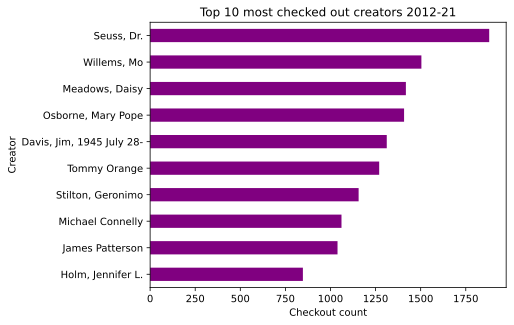

In [30]:
top10creators = checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10].sort_values()

ax = top10creators.plot(kind='barh', color='purple')
plt.xlabel('Checkout count')
plt.ylabel('Creator')
plt.title('Top 10 most checked out creators 2012-21')

plt.show()

#### Yearly checkouts for overall top 5 `creators`

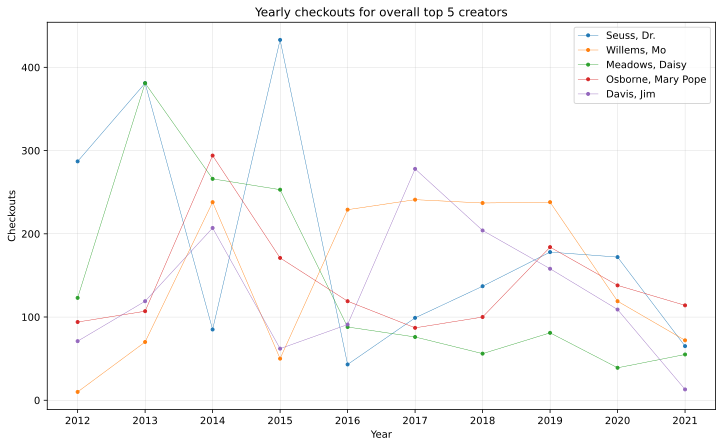

In [252]:
seuss_data = checkout_df[checkout_df['creator'] == 'Seuss, Dr.'].groupby('checkoutyear')['checkouts'].sum()
willems_data = checkout_df[checkout_df['creator'] == 'Willems, Mo'].groupby('checkoutyear')['checkouts'].sum()
meadows_data = checkout_df[checkout_df['creator'] == 'Meadows, Daisy'].groupby('checkoutyear')['checkouts'].sum()
osborne_data = checkout_df[checkout_df['creator'] == 'Osborne, Mary Pope'].groupby('checkoutyear')['checkouts'].sum()
davis_data = checkout_df[checkout_df['creator'] == 'Davis, Jim, 1945 July 28-'].groupby('checkoutyear')['checkouts'].sum()

# Increase plot size for better display
plt.figure(figsize=(12, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
plt.plot(seuss_data, label='Seuss, Dr.', marker='.', linewidth='0.4')
plt.plot(willems_data, label='Willems, Mo', marker='.', linewidth='0.4')
plt.plot(meadows_data, label='Meadows, Daisy', marker='.', linewidth='0.4')
plt.plot(osborne_data, label='Osborne, Mary Pope', marker='.', linewidth='0.4')
plt.plot(davis_data, label='Davis, Jim', marker='.', linewidth='0.4')

# Plot labels, legend, title
plt.xlabel('Year')
plt.ylabel('Checkouts')
plt.title('Yearly checkouts for overall top 5 creators')
plt.xticks(seuss_data.index)
plt.legend()

plt.show()

We know the checkout distribution for the overall top 5 creators. But how many titles are available for checkout for each of these creators?

In [272]:
top5_creators = list(checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:5].index)

checkout_df[checkout_df['creator'] == top5_creators[0]][['materialtype', 'creator', 'title', 'checkouts']]

,materialtype,creator,title,checkouts
1681,BOOK,"Seuss, Dr.","Hop on Pop, by Dr. Seuss.",87
1769,BOOK,"Seuss, Dr.",Los 500 sombreros de Bartolomé Cubbins / Dr. S...,1
4239,BOOK,"Seuss, Dr.",Guai jiao bao dian / wen tu Susi bo shi ; yi H...,1
8273,BOOK,"Seuss, Dr.",Scrambled eggs super! By Dr. Seuss [pseudonym],40
11762,BOOK,"Seuss, Dr.","If I ran the circus, by Dr. Seuss.",45
...,...,...,...,...
188031,BOOK,"Seuss, Dr.",My many colored days / by Dr. Seuss ; painting...,6
192964,BOOK,"Seuss, Dr.","Dr. Seuss's book of colors / [Dr. Seuss, author].",3
196847,BOOK,"Seuss, Dr.",The Cat in the Hat comes back! / by Dr. Seuss.,3
198222,BOOK,"Seuss, Dr.",Fox in socks / by Dr. Seuss.,7


#### Yearly checkouts per `usageclass` type

In [24]:
checkout_df.groupby('checkoutyear')['usageclass'].value_counts()

checkoutyear  usageclass
2012          Physical      16278
              Digital        3722
2013          Physical      15796
              Digital        4204
2014          Physical      14696
              Digital        5304
2015          Physical      13284
              Digital        6716
2016          Physical      12846
              Digital        7154
2017          Physical      12634
              Digital        7366
2018          Physical      12004
              Digital        7996
2019          Physical      12824
              Digital        7176
2020          Physical      11205
              Digital        8795
2021          Digital       10544
              Physical       9456
Name: count, dtype: int64

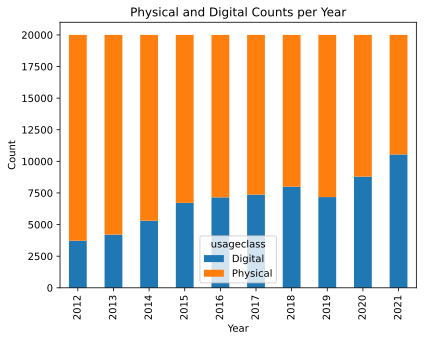

In [108]:
plot_data = checkout_df.groupby('checkoutyear')['usageclass'].value_counts().unstack()

ax = plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Physical and Digital Counts per Year')

plt.show()

#### Frequency distribution for `materialtype`

In [26]:
checkout_df.groupby('checkoutyear')['materialtype'].value_counts()

checkoutyear  materialtype        
2012          BOOK                    11497
              SOUNDDISC                2616
              EBOOK                    2076
              VIDEODISC                1933
              AUDIOBOOK                 780
                                      ...  
2021          SOUNDDISC, VIDEOCASS        1
              MIXED                       1
              MAP                         1
              UNSPECIFIED                 1
              ER, VIDEODISC               1
Name: count, Length: 224, dtype: int64

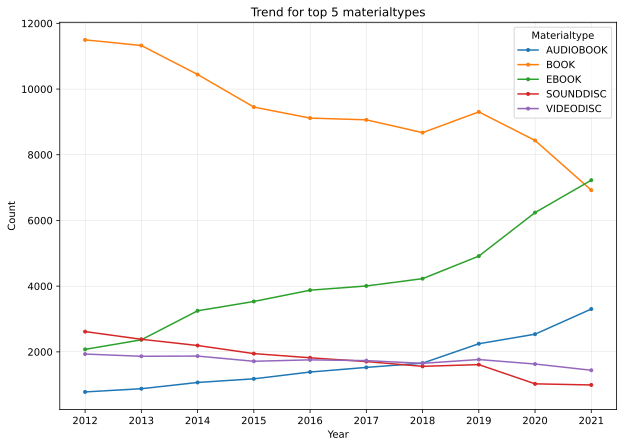

In [225]:
search_mtypes = ['BOOK',
                'SOUNDDISC',
                'EBOOK',
                'AUDIOBOOK',
                'VIDEODISC']

mtypes_df = checkout_df[checkout_df['materialtype'].isin(search_mtypes)]
mtypes_plot_data = mtypes_df.groupby('checkoutyear')['materialtype'].value_counts().unstack()

# Increase plot size for better display
plt.figure(figsize=(10, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
plt.plot(mtypes_plot_data, marker='.', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend for top 5 materialtypes')
plt.xticks(mtypes_plot_data.index)
plt.legend(title='Materialtype', labels=mtypes_plot_data.columns)

plt.show()

# Checkout Data Analysis 2021

## About the dataset

- Get library checkout data for the **whole year of 2021**
- Limit data entries per month to **20,000**
- Concat each year to a `pd.DataFrame`
- Save the complete DataFrame as `csv`

In [28]:
load_data(start_year=2021, end_year=2021, start_month=1, end_month=12,
          limit=20000, filename='2021_seattle_lib_checkouts.csv')

Loading csv data for 1/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=1&$limit=20000
Loading csv data for 2/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=2&$limit=20000
Loading csv data for 3/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=3&$limit=20000
Loading csv data for 4/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=4&$limit=20000
Loading csv data for 5/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=5&$limit=20000
Loading csv data for 6/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=6&$limit=20000
Loading csv data for 7/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=7&$limit=20000
Loading csv data for 8/2021 from: https://data.s

## Analysis

In [114]:
# Read csv
checkouts2021_df = pd.read_csv('2021_seattle_lib_checkouts.csv')

In [115]:
checkouts2021_df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2021,1,1,California: A History,NaN,Kevin Starr,"History, Nonfiction, Reference","Random House, Inc.",2010
1,Digital,OverDrive,EBOOK,2021,1,2,Agnes Grey,NaN,Anne Brontë,"Classic Literature, Fiction",Duke Classics,2020
2,Digital,OverDrive,EBOOK,2021,1,12,Tailspin,NaN,Sandra Brown,"Fiction, Romance, Suspense, Thriller","Hachette Digital, Inc.",2018
3,Digital,OverDrive,EBOOK,2021,1,1,Unleashed,NaN,Laurien Berenson,"Fiction, Mystery",Lightning Source Inc,2016
4,Physical,Horizon,BOOK,2021,1,1,The stoic / Theodore Dreiser.,NaN,"Dreiser, Theodore, 1871-1945",NaN,"World Pub. Co.,",[1947]


In [116]:
# Check if every month is present and evenly distributed
checkouts2021_df['checkoutmonth'].value_counts()

checkoutmonth
1     20000
2     20000
3     20000
4     20000
5     20000
6     20000
7     20000
8     20000
9     20000
10    20000
11    20000
12    20000
Name: count, dtype: int64

In [117]:
checkouts2021_df.shape

(240000, 12)

### Improve memory usage

In [119]:
checkouts2021_df = improve_memory_usage(checkouts2021_df)
del checkouts2021_df['isbn']

In [120]:
checkouts2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   usageclass       240000 non-null  category
 1   checkouttype     240000 non-null  category
 2   materialtype     240000 non-null  object  
 3   checkoutyear     240000 non-null  int16   
 4   checkoutmonth    240000 non-null  int8    
 5   checkouts        240000 non-null  int16   
 6   title            240000 non-null  object  
 7   creator          218514 non-null  object  
 8   subjects         238786 non-null  object  
 9   publisher        239574 non-null  object  
 10  publicationyear  239516 non-null  object  
dtypes: category(2), int16(2), int8(1), object(6)
memory usage: 12.6+ MB


### **Statistics and Distributions**

#### Frequency distribution by `materialtype` (books, ebooks, audiobooks etc.)

In [121]:
checkouts2021_df['materialtype'].value_counts()[:10]

materialtype
BOOK                    89497
EBOOK                   82352
AUDIOBOOK               38702
VIDEODISC               16064
SOUNDDISC               11884
REGPRINT                  572
MUSIC                     289
SOUNDDISC, VIDEODISC      125
VIDEO                     119
LARGEPRINT                108
Name: count, dtype: int64

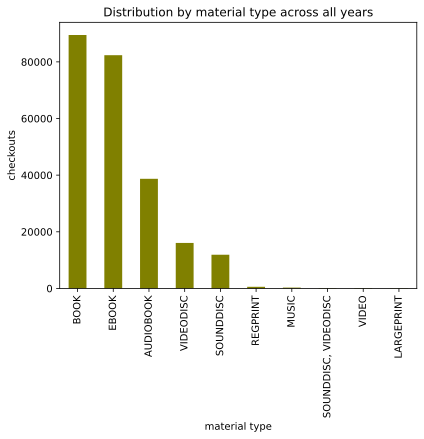

In [122]:
# Plot top 10 materialtypes
checkouts2021_df['materialtype'].value_counts()[:10].plot.bar(color='olive', 
                                                         xlabel='material type', 
                                                         ylabel='checkouts',
                                                         title='Distribution by material type across all years');

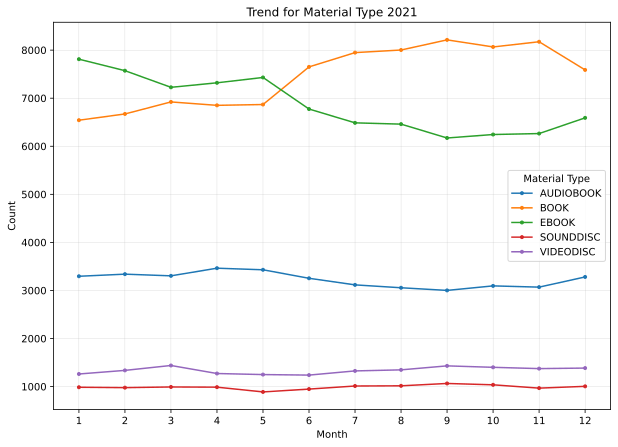

In [257]:
search_mtypes = ['BOOK',
                'SOUNDDISC',
                'EBOOK',
                'AUDIOBOOK',
                'VIDEODISC']

mtypes_df = checkouts2021_df[checkouts2021_df['materialtype'].isin(search_mtypes)]
mtypes_plot_data = mtypes_df.groupby('checkoutmonth')['materialtype'].value_counts().unstack()

# Increase plot size for better display
plt.figure(figsize=(10, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

plt.plot(mtypes_plot_data, marker='.', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(mtypes_plot_data.index)
plt.title('Trend for Material Type 2021')
plt.legend(title='Material Type', labels=mtypes_plot_data.columns)

plt.show()

#### Top 10 `titles` with most checkouts across all months

In [37]:
checkouts2021_df.groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator                title                                                                                
AUDIOBOOK     Malcolm Gladwell       Talking to Strangers: What We Should Know about the People We Don't Know (unabridged)    1049
EBOOK         Brit Bennett           The Vanishing Half: A Novel                                                               898
              S. F. Kosa             The Quiet Girl                                                                            856
BOOK          Zauner, Michelle       Crying in H Mart : a memoir / Michelle Zauner.                                            762
              Gupta, Sanjay, 1969-   Keep sharp : build a better brain at any age / Sanjay Gupta with Kristin Loberg.          743
EBOOK         Andy Weir              Project Hail Mary: A Novel                                                                728
AUDIOBOOK     Lucy Foley             The Guest List: A Novel (unabridged)                  

#### Top 10 `Books` across all months

In [273]:
checkouts2021_df.query('materialtype == "BOOK"').groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator                      title                                                                                                                                 
BOOK          Zauner, Michelle             Crying in H Mart : a memoir / Michelle Zauner.                                                                                            762
              Gupta, Sanjay, 1969-         Keep sharp : build a better brain at any age / Sanjay Gupta with Kristin Loberg.                                                          743
              Harris, Zakiya Dalila        The other Black girl : a novel / Zakiya Dalila Harris.                                                                                    657
              Garten, Ina                  Modern comfort food : a Barefoot Contessa cookbook / Ina Garten ; photographs by Quentin Bacon ; party photographs by Jean-Pierre Uys.    542
              Lewis, Michael (Michael M.)  The premonition : a pandemic story / Mi

In [282]:
# Plot trend for top 5 books
top5_books = list(checkouts2021_df.query('materialtype == "BOOK"').groupby('title')['checkouts'].sum().sort_values(ascending=False)[:5].index)
top5_books_data = checkouts2021_df[checkouts2021_df['title'].isin(top5_books)][['title', 'checkoutmonth', 'checkouts']]



,title,checkoutmonth,checkouts
46365,Keep sharp : build a better brain at any age /...,3,326
51585,Modern comfort food : a Barefoot Contessa cook...,3,280
81441,Modern comfort food : a Barefoot Contessa cook...,5,262
97694,Crying in H Mart : a memoir / Michelle Zauner.,5,172
131979,The other Black girl : a novel / Zakiya Dalila...,7,289
139734,Crying in H Mart : a memoir / Michelle Zauner.,7,315
157211,Keep sharp : build a better brain at any age /...,8,310
160507,The premonition : a pandemic story / Michael L...,9,257
162725,Keep sharp : build a better brain at any age /...,9,107
189869,The other Black girl : a novel / Zakiya Dalila...,10,195


#### Top 10 `Ebooks` across all months

In [274]:
checkouts2021_df.query('materialtype == "EBOOK"').groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator        title                                      
EBOOK         Brit Bennett   The Vanishing Half: A Novel                    898
              S. F. Kosa     The Quiet Girl                                 856
              Andy Weir      Project Hail Mary: A Novel                     728
              Barack Obama   A Promised Land                                568
              Kevin Kwan     Sex and Vanity: A Novel                        545
              Matt Haig      The Midnight Library: A Novel                  493
              Leigh Bardugo  Shadow and Bone: The Grisha Trilogy, Book 1    488
              Kiley Reid     Such a Fun Age                                 443
              Delia Owens    Where the Crawdads Sing                        428
              Frank Herbert  Dune: Dune Series, Book 1                      424
Name: checkouts, dtype: int16

#### Top 10 `Audiobooks` across all months

In [275]:
checkouts2021_df.query('materialtype == "AUDIOBOOK"').groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator           title                                                                                                           
AUDIOBOOK     Malcolm Gladwell  Talking to Strangers: What We Should Know about the People We Don't Know (unabridged)                               1049
              Lucy Foley        The Guest List: A Novel (unabridged)                                                                                 664
              Brit Bennett      The Vanishing Half: A Novel (unabridged) (Unabridged)                                                                656
              V. E. Schwab      The Invisible Life of Addie LaRue (unabridged)                                                                       499
              Malcolm Gladwell  Talking to Strangers: What We Should Know about the People We Don't Know (unabridged) (Unabridged)                   450
              J.R.R. Tolkien    The Fellowship of the Ring: The Lord of the Rings Series, 

#### Overall top 10 most checked out `creators` across all months and mediatypes

In [38]:
checkouts2021_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10]

creator
Willems, Mo         2232
James Patterson     2184
Agatha Christie     1892
Julia Quinn         1849
Louise Penny        1830
Malcolm Gladwell    1810
Jeff Kinney         1756
Stephen King        1717
John Grisham        1675
Michael Connelly    1632
Name: checkouts, dtype: int16

#### Checkout trend for Top 5 `creators` across all months

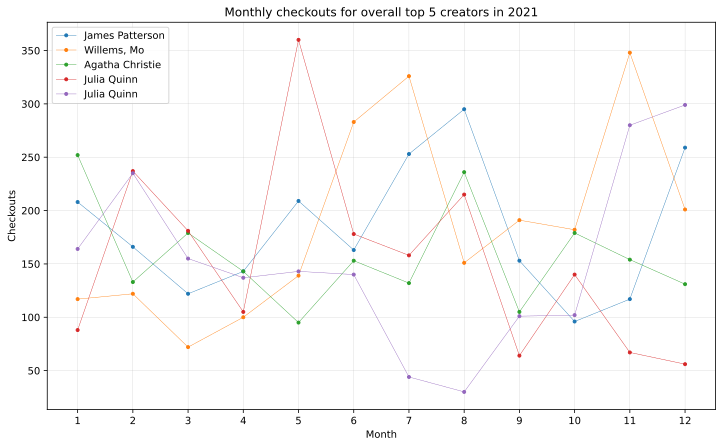

In [262]:
patterson_data = checkouts2021_df[checkouts2021_df['creator'] == 'James Patterson'].groupby('checkoutmonth')['checkouts'].sum()
willems_data = checkouts2021_df[checkouts2021_df['creator'] == 'Willems, Mo'].groupby('checkoutmonth')['checkouts'].sum()
christie_data = checkouts2021_df[checkouts2021_df['creator'] == 'Agatha Christie'].groupby('checkoutmonth')['checkouts'].sum()
quinn_data = checkouts2021_df[checkouts2021_df['creator'] == 'Julia Quinn'].groupby('checkoutmonth')['checkouts'].sum()
penny_data = checkouts2021_df[checkouts2021_df['creator'] == 'Louise Penny'].groupby('checkoutmonth')['checkouts'].sum()

# Increase plot size for better display
plt.figure(figsize=(12, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
plt.plot(patterson_data, label='James Patterson', marker='.', linewidth='0.4')
plt.plot(willems_data, label='Willems, Mo', marker='.', linewidth='0.4')
plt.plot(christie_data, label='Agatha Christie', marker='.', linewidth='0.4')
plt.plot(quinn_data, label='Julia Quinn', marker='.', linewidth='0.4')
plt.plot(penny_data, label='Julia Quinn', marker='.', linewidth='0.4')

# Plot labels, legend, title
plt.xlabel('Month')
plt.ylabel('Checkouts')
plt.xticks(christie_data.index)
plt.title('Monthly checkouts for overall top 5 creators in 2021')
plt.legend()

plt.show()

#### Monthly checkouts per `usageclass` type

In [40]:
checkouts2021_df.groupby('checkoutmonth')['usageclass'].value_counts()

checkoutmonth  usageclass
1              Digital       11122
               Physical       8878
2              Digital       10922
               Physical       9078
3              Digital       10544
               Physical       9456
4              Digital       10788
               Physical       9212
5              Digital       10872
               Physical       9128
6              Digital       10043
               Physical       9957
7              Physical      10389
               Digital        9611
8              Physical      10479
               Digital        9521
9              Physical      10816
               Digital        9184
10             Physical      10656
               Digital        9344
11             Physical      10654
               Digital        9346
12             Physical      10124
               Digital        9876
Name: count, dtype: int64

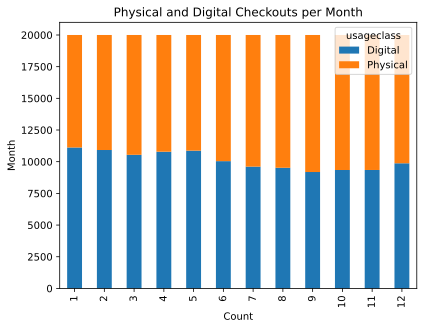

In [41]:
plot_data = checkouts2021_df.groupby('checkoutmonth')['usageclass'].value_counts().unstack()

ax = plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Count')
plt.ylabel('Month')
plt.title('Physical and Digital Checkouts per Month')

plt.show()